In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
#Loading Data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
#Merging two datasets
dataset = pd.merge(ratings, movies, on='movieId', how='left')
dataset

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [ ]:
#removing duplicates
df = dataset.drop_duplicates(['userId','title'])

In [ ]:
df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)
df_pivot = df_pivot.astype('int64')
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)
df_pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


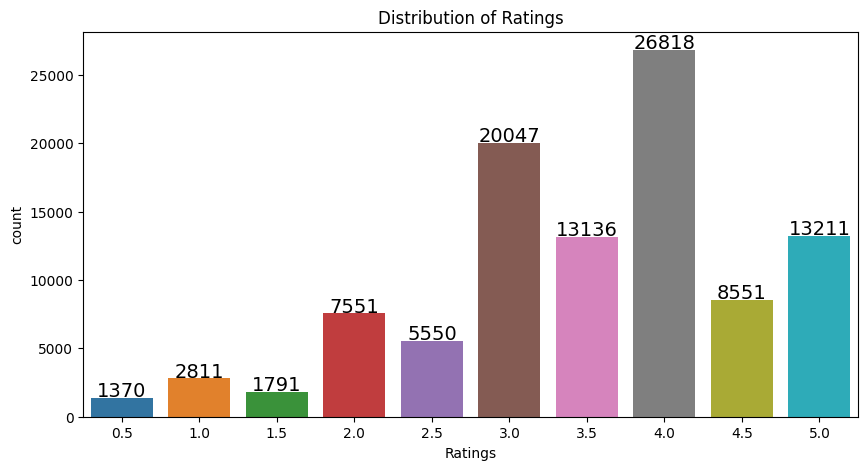

In [ ]:
#plot number of users's ratings to movies
plt.figure(figsize=(10,5))
ax = sns.countplot(data=ratings, x='rating')
labels = (ratings['rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

In [ ]:
#Number of ratings
print("Number of ratings is: ", len(ratings))

Number of ratings is:  100836


In [ ]:
#Number of movies
print("Number of movies is: ", len(movies))
print()
print("Number of uniques movies is: ", movies.title.nunique())


Number of movies is:  9742

Number of uniques movies is:  9737


In [ ]:
TenMoviesIds = dataset.movieId.value_counts()[:10].index.tolist()
TenMoviesNames = []

for i in TenMoviesIds:
  mm = movies.loc[movies['movieId'] == i]
  TenMoviesNames.append(mm['title'])

print(TenMoviesNames)

[314    Forrest Gump (1994)
Name: title, dtype: object, 277    Shawshank Redemption, The (1994)
Name: title, dtype: object, 257    Pulp Fiction (1994)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 1939    Matrix, The (1999)
Name: title, dtype: object, 224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object, 418    Jurassic Park (1993)
Name: title, dtype: object, 97    Braveheart (1995)
Name: title, dtype: object, 507    Terminator 2: Judgment Day (1991)
Name: title, dtype: object, 461    Schindler's List (1993)
Name: title, dtype: object]


In [ ]:
movies.loc[movies.apply(lambda x: x.movieId in TenMoviesIds, axis=1)]

,movieId,title,genres
97,110,Braveheart (1995),Action|Drama|War
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
461,527,Schindler's List (1993),Drama|War
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [ ]:
movies[movies.title.str.contains("Forrest Gump")]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [ ]:
len(ratings[ratings.movieId == 356])

329

In [ ]:
#Apriori Algorithm
frequent_itemset = apriori(df_pivot, min_support=0.1, use_colnames=True)
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset

,support,itemsets,length
0,0.178689,(2001: A Space Odyssey (1968)),1
1,0.129508,(300 (2007)),1
2,0.119672,"(40-Year-Old Virgin, The (2005))",1
3,0.260656,(Ace Ventura: Pet Detective (1994)),1
4,0.144262,(Ace Ventura: When Nature Calls (1995)),1
...,...,...,...
108776,0.100000,(Lord of the Rings: The Fellowship of the Ring...,9
108777,0.101639,(Lord of the Rings: The Fellowship of the Ring...,9
108778,0.101639,"(Star Wars: Episode IV - A New Hope (1977), Pu...",9
108779,0.100000,"(Star Wars: Episode IV - A New Hope (1977), Ju...",9


In [ ]:
frequent_itemset[(frequent_itemset['support'] >= 0.1) & (frequent_itemset['length'] >= 2)]

,support,itemsets,length
320,0.122951,"(Alien (1979), 2001: A Space Odyssey (1968))",2
321,0.116393,"(2001: A Space Odyssey (1968), Aliens (1986))",2
322,0.114754,"(American Beauty (1999), 2001: A Space Odyssey...",2
323,0.100000,"(Apocalypse Now (1979), 2001: A Space Odyssey ...",2
324,0.116393,"(2001: A Space Odyssey (1968), Back to the Fut...",2
...,...,...,...
108776,0.100000,(Lord of the Rings: The Fellowship of the Ring...,9
108777,0.101639,(Lord of the Rings: The Fellowship of the Ring...,9
108778,0.101639,"(Star Wars: Episode IV - A New Hope (1977), Pu...",9
108779,0.100000,"(Star Wars: Episode IV - A New Hope (1977), Ju...",9


In [ ]:
frequent_itemset[(frequent_itemset['support'] >= 0.2) & (frequent_itemset['length'] >= 2)]

,support,itemsets,length
375,0.204918,"(Forrest Gump (1994), Ace Ventura: Pet Detecti...",2
392,0.200000,"(Ace Ventura: Pet Detective (1994), Pulp Ficti...",2
441,0.201639,"(Aladdin (1992), Beauty and the Beast (1991))",2
454,0.227869,"(Aladdin (1992), Forrest Gump (1994))",2
469,0.211475,"(Aladdin (1992), Jurassic Park (1993))",2
...,...,...,...
47786,0.221311,"(Forrest Gump (1994), Pulp Fiction (1994), Sil...",4
48354,0.200000,(Star Wars: Episode VI - Return of the Jedi (1...,4
55261,0.209836,(Lord of the Rings: The Fellowship of the Ring...,4
58440,0.219672,(Star Wars: Episode VI - Return of the Jedi (1...,4


In [ ]:
frequent_itemset[(frequent_itemset['support'] >= 0.3) & (frequent_itemset['length'] >= 2)]

,support,itemsets,length
2745,0.322951,"(Forrest Gump (1994), Jurassic Park (1993))",2
2761,0.309836,"(Forrest Gump (1994), Matrix, The (1999))",2
2787,0.375410,"(Forrest Gump (1994), Pulp Fiction (1994))",2
2798,0.378689,"(Forrest Gump (1994), Shawshank Redemption, Th...",2
2802,0.322951,"(Forrest Gump (1994), Silence of the Lambs, Th...",2
4637,0.362295,"(Pulp Fiction (1994), Shawshank Redemption, Th...",2
4641,0.339344,"(Pulp Fiction (1994), Silence of the Lambs, Th...",2
4844,0.322951,"(Silence of the Lambs, The (1991), Shawshank R...",2
5039,0.311475,(Star Wars: Episode V - The Empire Strikes Bac...,2


In [ ]:
frequent_itemset[(frequent_itemset['support'] >= 0.5) & (frequent_itemset['length'] >= 2)]

,support,itemsets,length


In [ ]:
#frequent itemsets with min support equals 0.3
ar = frequent_itemset[frequent_itemset['support'] >= 0.3]
ar

,support,itemsets,length
13,0.332787,(American Beauty (1999)),1
19,0.329508,(Apollo 13 (1995)),1
31,0.309836,(Batman (1989)),1
50,0.386885,(Braveheart (1995)),1
107,0.352459,(Fight Club (1999)),1
111,0.537705,(Forrest Gump (1994)),1
113,0.309836,"(Fugitive, The (1993))",1
122,0.314754,"(Godfather, The (1972))",1
150,0.327869,(Independence Day (a.k.a. ID4) (1996)),1
162,0.388525,(Jurassic Park (1993)),1


In [ ]:
#frequent itemsets with min support equals 0.3 and confidence equals 0.6
rules = association_rules(ar, metric="confidence", min_threshold=0.6)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.409836,0.344262,0.311475,0.760000,2.207619,0.170384,2.732240
15,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.344262,0.409836,0.311475,0.904762,2.207619,0.170384,6.196721
1,(Jurassic Park (1993)),(Forrest Gump (1994)),0.388525,0.537705,0.322951,0.831224,1.545873,0.114039,2.739098
0,(Forrest Gump (1994)),(Jurassic Park (1993)),0.537705,0.388525,0.322951,0.600610,1.545873,0.114039,1.531022
11,(Pulp Fiction (1994)),"(Silence of the Lambs, The (1991))",0.500000,0.452459,0.339344,0.678689,1.500000,0.113115,1.704082
12,"(Silence of the Lambs, The (1991))",(Pulp Fiction (1994)),0.452459,0.500000,0.339344,0.750000,1.500000,0.113115,2.000000
4,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.500000,0.537705,0.375410,0.750820,1.396341,0.106557,1.855263
3,(Forrest Gump (1994)),(Pulp Fiction (1994)),0.537705,0.500000,0.375410,0.698171,1.396341,0.106557,1.656566
9,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.500000,0.519672,0.362295,0.724590,1.394322,0.102459,1.744048
10,"(Shawshank Redemption, The (1994))",(Pulp Fiction (1994)),0.519672,0.500000,0.362295,0.697161,1.394322,0.102459,1.651042


In [ ]:
#frequent itemsets with min support equals 0.3 and confidence equals 0.8
rules_2 = association_rules(ar, metric="confidence", min_threshold=0.8)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Jurassic Park (1993)),(Forrest Gump (1994)),0.388525,0.537705,0.322951,0.831224,1.545873,0.114039,2.739098
1,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.344262,0.409836,0.311475,0.904762,2.207619,0.170384,6.196721
